In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
df = pd.read_csv('forestfires.csv')

In [3]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
object_columns = df.select_dtypes(['object']).columns
df[object_columns] = df[object_columns].apply(lambda x: x.astype('category'))

In [5]:
cat_columns = df.select_dtypes(['category']).columns

df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [7]:
df['area_log'] = np.log(df.area+1)

In [8]:
df['area_bins'] = pd.qcut(df['area_log'],2, labels=[0,1])
df.drop(['area','area_log'],axis=1,inplace=True)

In [9]:
df['area_bins']

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: area_bins, Length: 517, dtype: category
Categories (2, int64): [0 < 1]

In [10]:
y=df.pop('area_bins')
X=df

In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: area_bins, Length: 517, dtype: category
Categories (2, int64): [0 < 1]

In [11]:
RS=123
time_start = time.time()
fashion_tsne_2d = TSNE(n_components=2,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(X)
print('t-SNE Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.001s...
[t-SNE] Computed neighbors for 517 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 13.910009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 257.285828
[t-SNE] KL divergence after 500 iterations: 0.177266
t-SNE Time elapsed: 0.6464481353759766 seconds


In [12]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [13]:

RS=123
def fashion_scatter_2d(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(24, 6))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

<IPython.core.display.Javascript object>


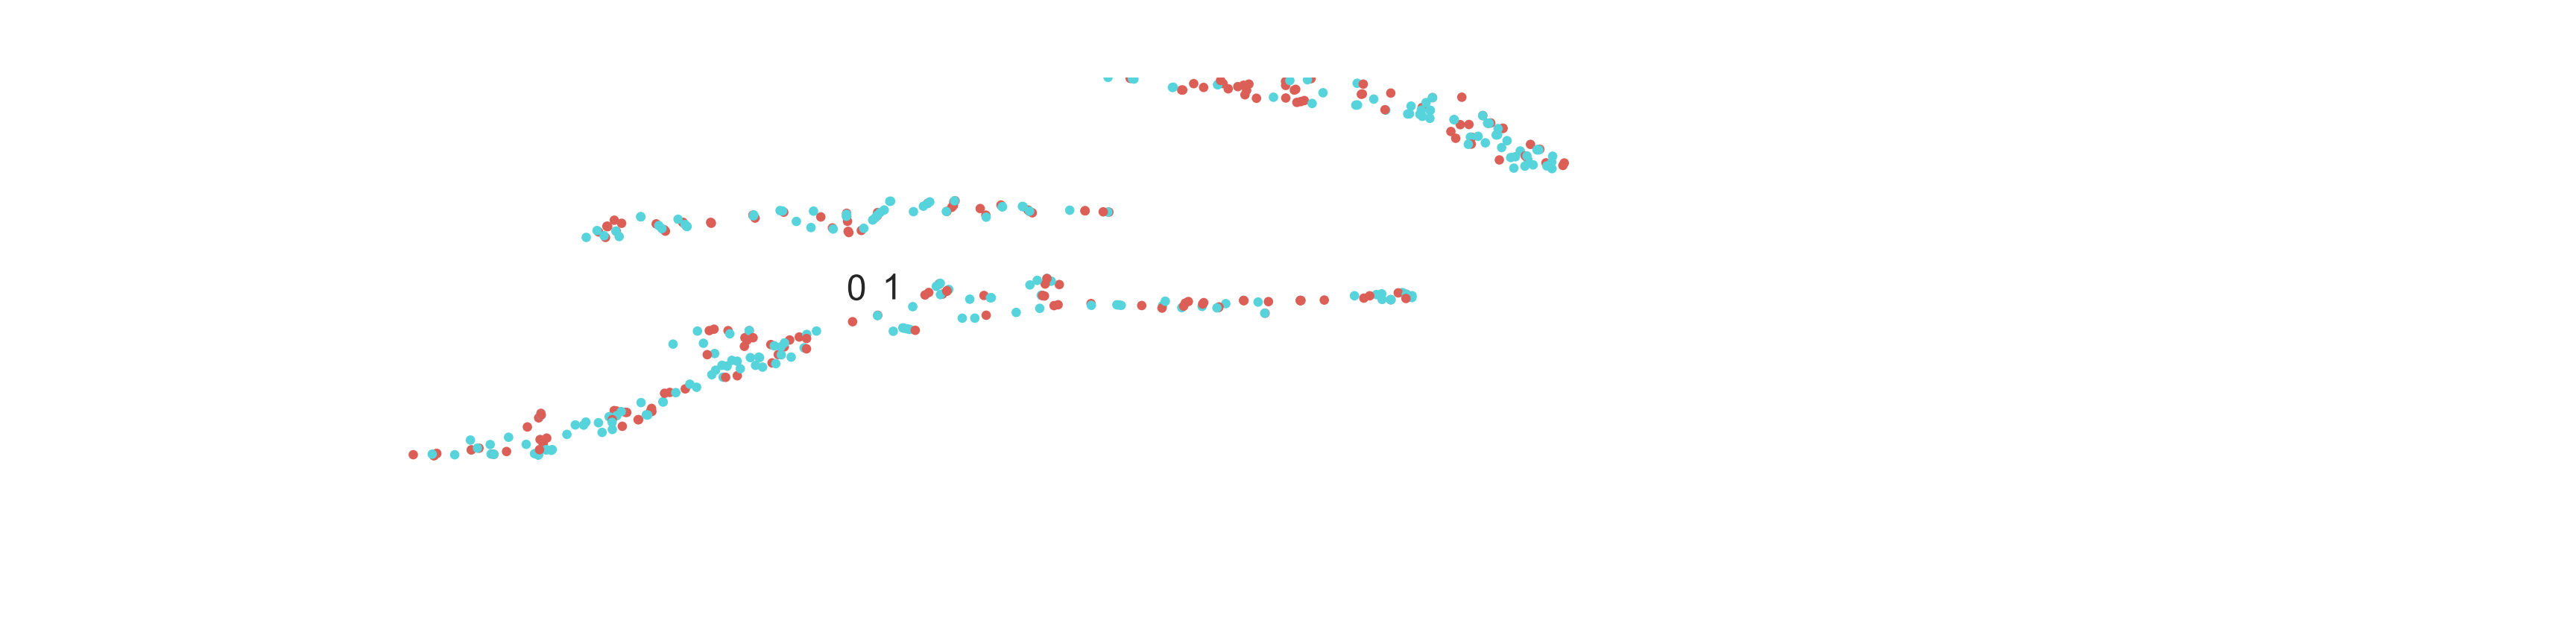

(<Figure size 1728x432 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-0.39586335, -1.1037307, '0'), Text(0.51139, -1.0212464, '1')])

In [14]:
%matplotlib notebook
fashion_scatter_2d(fashion_tsne_2d, y)

In [15]:
time_start = time.time()
fashion_tsne_3d = TSNE(n_components=3,perplexity=40,early_exaggeration= 40,n_iter=500,verbose=1,random_state=RS).fit_transform(X)
print('t-SNE Time : {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.000s...
[t-SNE] Computed neighbors for 517 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 13.910009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 368.438812
[t-SNE] KL divergence after 500 iterations: 2.642489
t-SNE Time : 1.1368591785430908 seconds


In [17]:
import matplotlib.animation as animation
from numpy.random import normal as normal


<IPython.core.display.Javascript object>


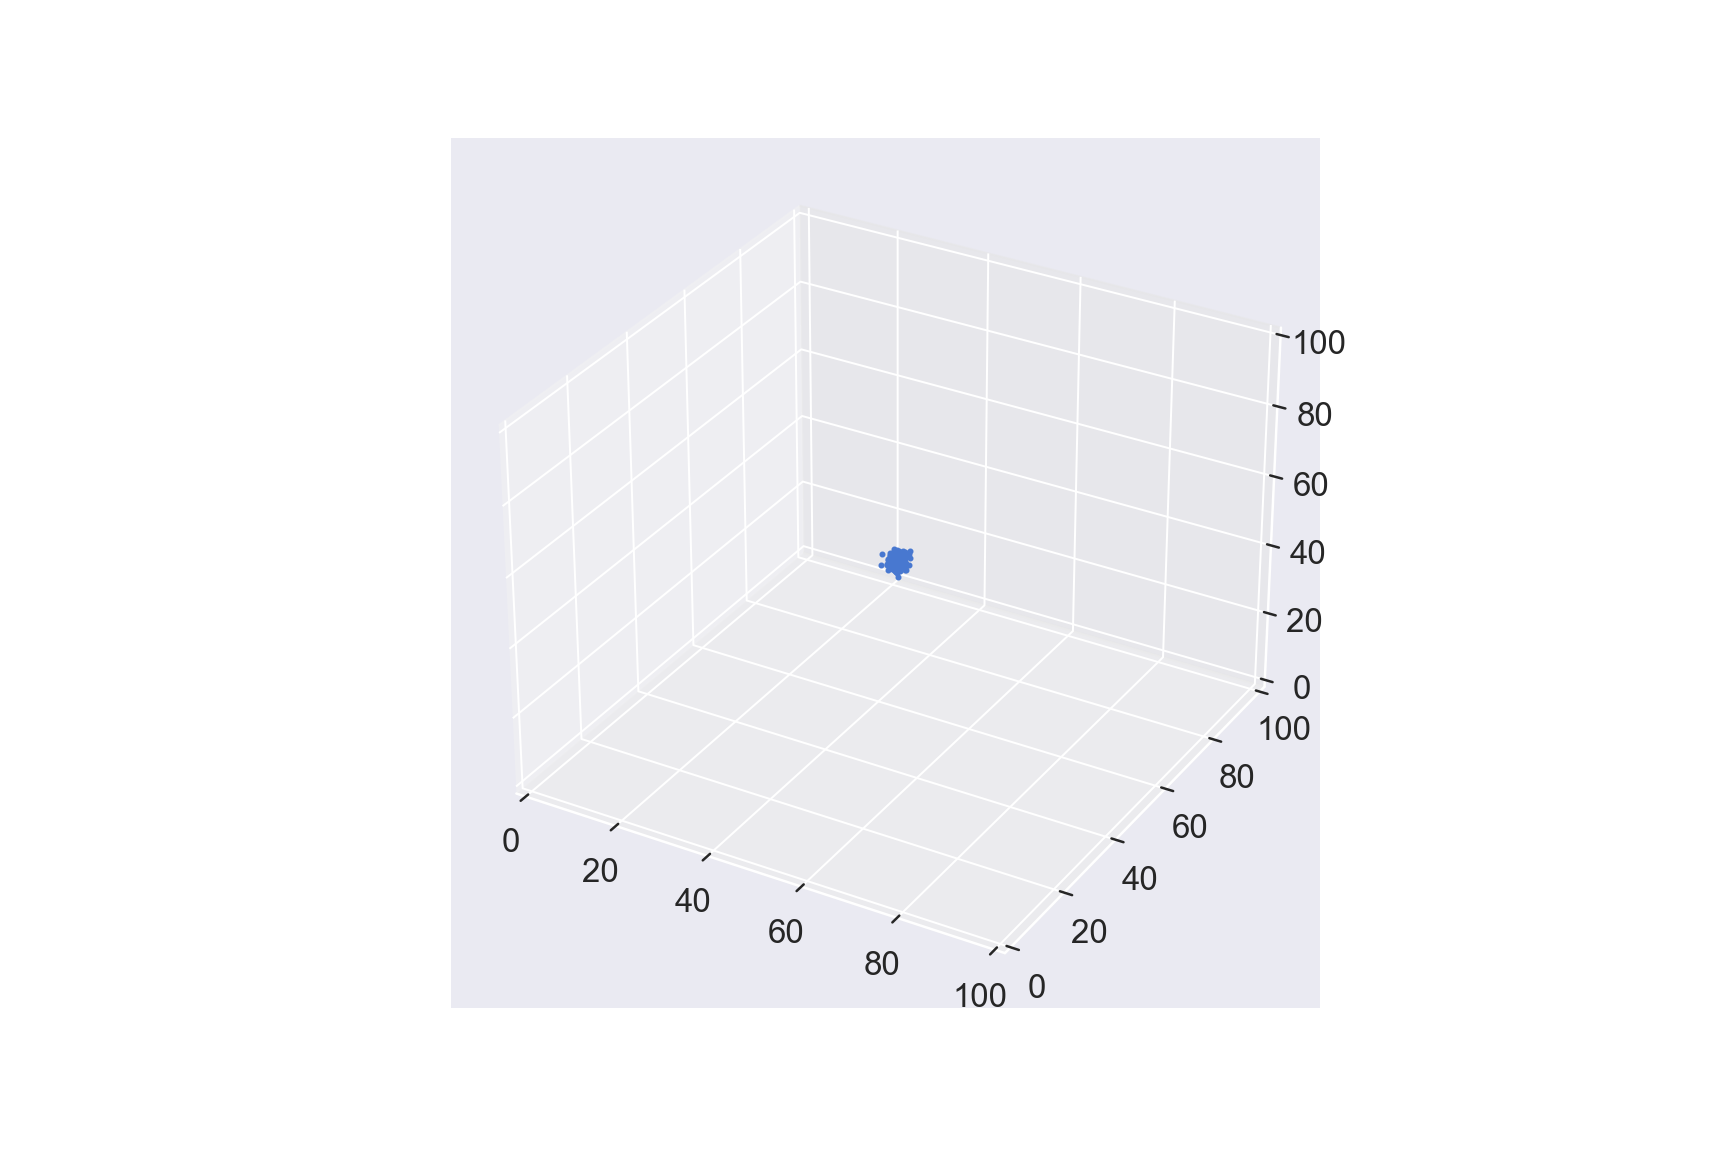

In [109]:
# 3D animation

nfr = 30 # Number of frames
fps = 10 # Frame per sec
xs = []
ys = []
zs = []
ss = np.arange(1,nfr,0.5)
for s in ss:
    xs.append(normal(50,s,200))
    ys.append(normal(50,s,200))
    zs.append(normal(50,s,200))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], "o", markersize=2)
def update(ifrm, xa, ya, za):
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_zlim(0,100)
ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs), interval=1000/fps)

In [67]:
#xs is list of 58 lists w/ 200 items
xs

[array([51.02431502, 49.19502437, 49.23530847, 51.64298655, 48.87874306,
        48.30752652, 49.42239282, 49.02254622, 50.86933277, 50.60580006,
        48.62840336, 49.02283849, 50.79781086, 49.56523098, 48.33769839,
        49.92035211, 50.26173045, 51.5707752 , 50.60906073, 49.18828549,
        51.24062433, 49.6500435 , 51.04460073, 50.24703383, 50.68043875,
        49.86037538, 50.13498692, 51.41271545, 49.92548213, 50.27299667,
        49.63626052, 47.93462535, 50.23937045, 48.69295216, 50.84751211,
        49.1493984 , 50.31199401, 49.28444975, 52.13071373, 49.71062501,
        51.28462507, 50.2648321 , 51.61747038, 49.60962516, 49.28562865,
        48.96241908, 49.18308154, 49.79914934, 49.06869084, 48.9735553 ,
        50.51049061, 48.24851203, 50.4164688 , 50.09478715, 50.61709399,
        51.30297011, 49.86331272, 51.28823347, 50.80392334, 48.21130564,
        48.65314096, 49.07748732, 49.01232017, 50.75684603, 50.05615258,
        50.50669067, 51.26779117, 48.7491273 , 51.4

In [47]:
fashion_tsne_3d.shape

(517, 3)

In [68]:
fashion_tsne_3d[:,0].shape

(517,)

<IPython.core.display.Javascript object>


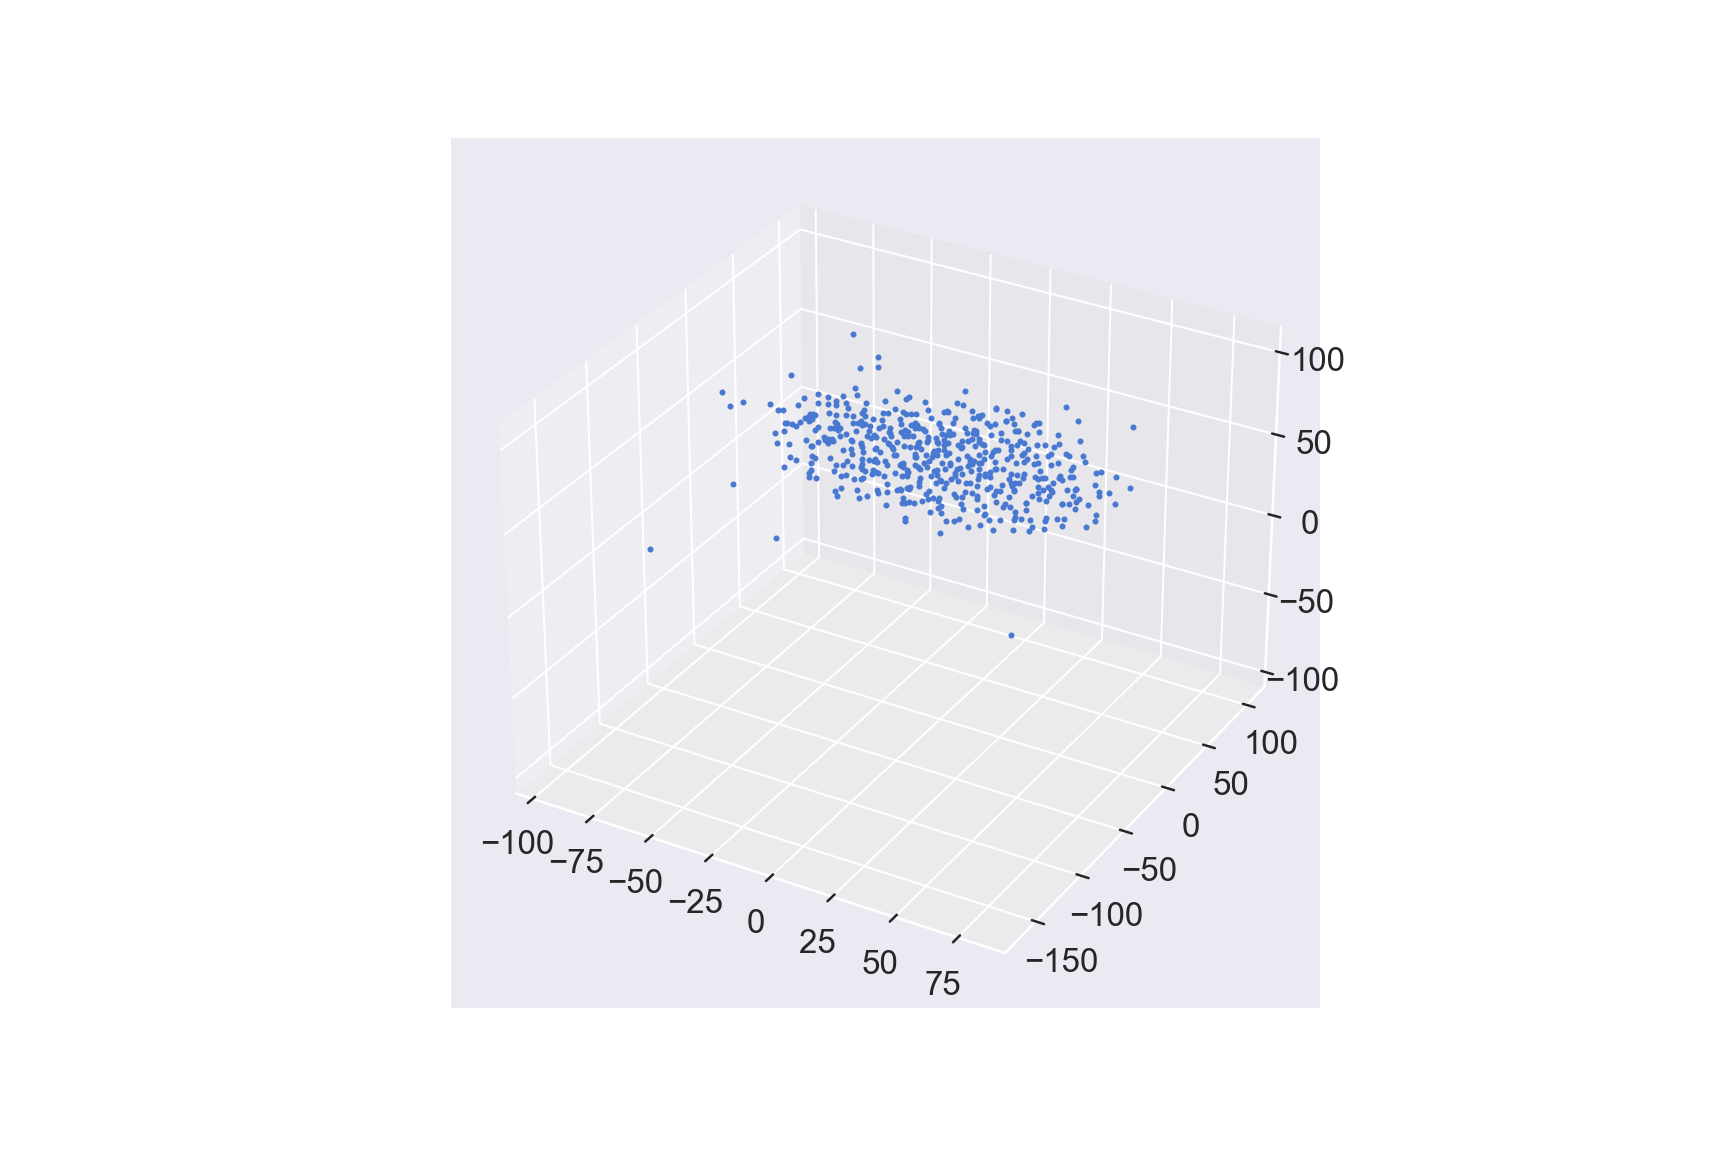

In [144]:
# 3D animation




nfr = 300 # Number of frames
fps = 10 # Frame per sec
xs = fashion_tsne_3d[:,0]
ys = fashion_tsne_3d[:,1]
zs = fashion_tsne_3d[:,2]


    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot(xs, ys, zs, "o", markersize=2)


def update(ifrm, xa, ya, za):
    sct.set_data(xa, ya)
    sct.set_3d_properties(za[ifrm])
    
ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs), interval=10)


In [128]:
len(fashion_tsne_3d[:,2])

517

In [94]:
xs[0]

-40.79756

In [98]:
def fashion_scatter_3d(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 6))
    ax = f.add_subplot(111, projection='3d')
    sc = ax.scatter(x[:,0], x[:,1],x[:,2], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext , ztext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext,ztext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

<IPython.core.display.Javascript object>


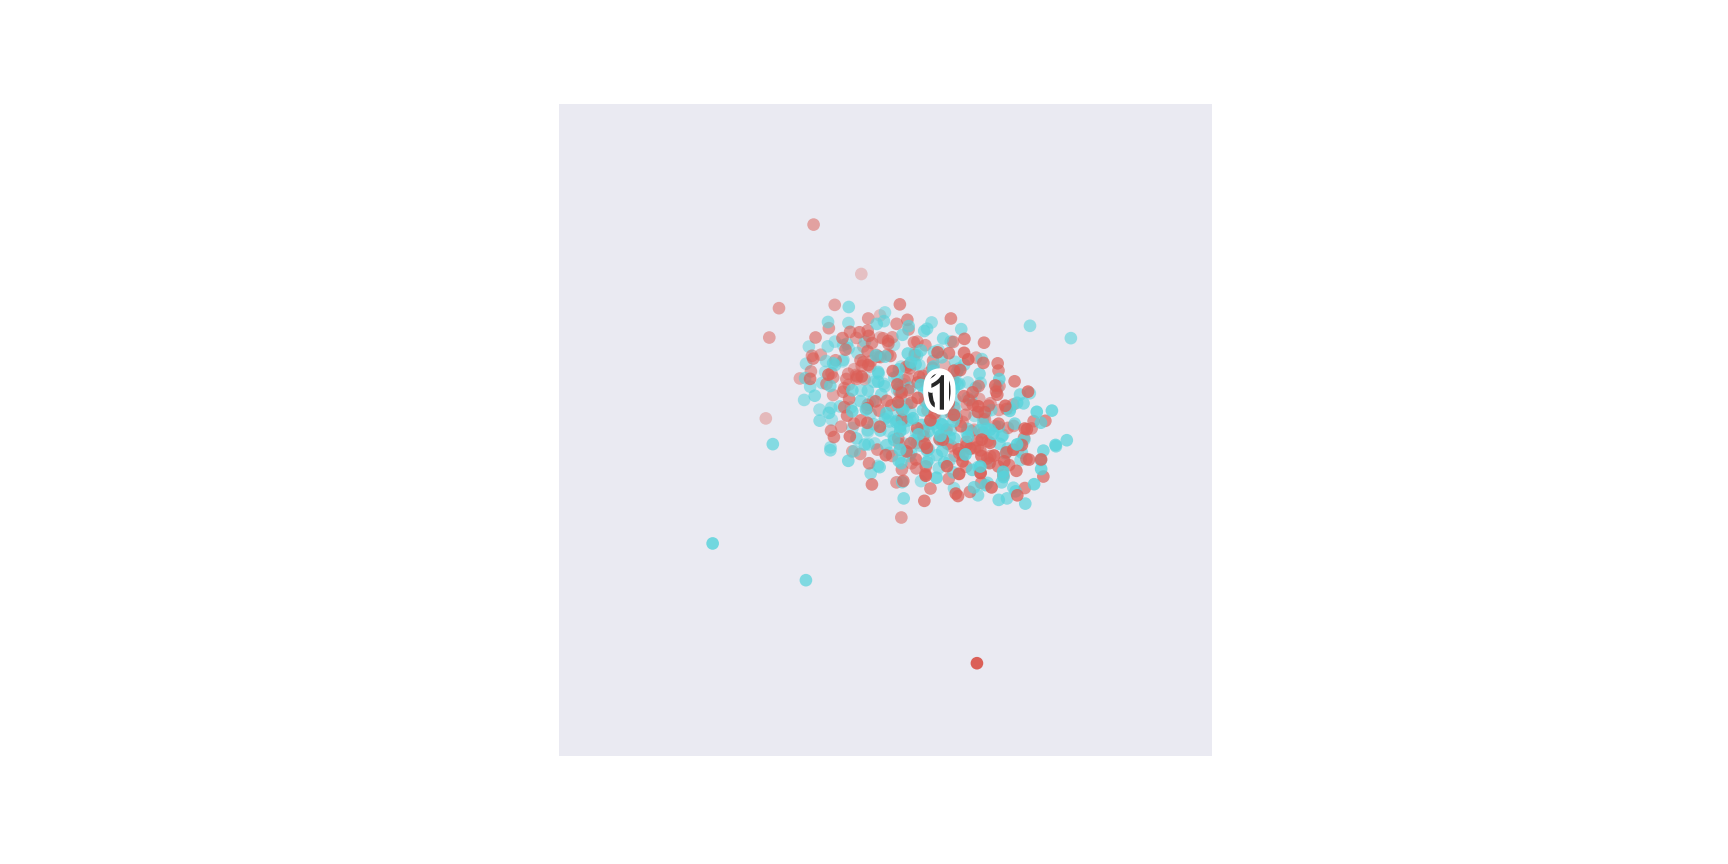

(<Figure size 864x432 with 1 Axes>,
 <Axes3DSubplot:>,
 [Text(-0.011636848, -1.6342815, '0'), Text(-1.4791294, 2.2779198, '1')])

In [99]:
fashion_scatter_3d(fashion_tsne_3d, y)